In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [3]:
import os
from itertools import zip_longest

import numpy as np
import matplotlib.pyplot as plt

from dogo.constants import FIG_DIR
from dogo.results import get_results, get_experiment_details
from dogo.plot_results import plot_experiment_metrics, plot_min_max_logvars, plot_evaluation_returns, plot_grouped_evaluation_returns, plot_min_max_penalty

In [9]:
plt.rc('font', size=24)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Results Summary

In [5]:
no_rex = [4961, 1888, 14, 50]
rex_5 = [2627, 5595, 4085, 2575]
rex_10 = [3160, 3698, 4747, 3018]
rex_20 = [3273, 2986, 3801, 2807]

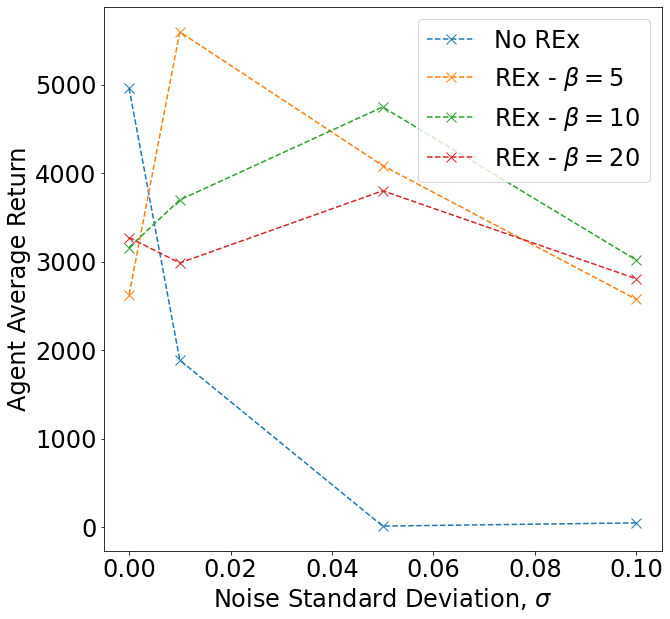

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

noise_vals = [0, 0.01, 0.05, 0.1]
for res_arr, label in [
    (no_rex, 'No REx'), 
    (rex_5, 'REx - $\\beta=5$'), 
    (rex_10, 'REx - $\\beta=10$'), 
    (rex_20, 'REx - $\\beta=20$'), 
]:
    ax.plot(noise_vals, res_arr, ls='--', marker='x', markersize=10, label=label)
ax.set_xlabel('Noise Standard Deviation, $\sigma$')
ax.set_ylabel('Agent Average Return')
# ax.set_title('HalfCheetah - Mixed Dataset - $\\lambda=0$, $h=5$')
ax.legend()
fig.savefig(os.path.join(FIG_DIR, 'workshop', 'policy_training_eval_return_noisy_hc_mixed_lam0_h5.png'), pad_inches=0.2, bbox_inches='tight')

# MOPO: 0.0 - Rollout-Length: 5.0 - No Noise

In [5]:
HC049 = get_results("HC049") # No Rex
HC050 = get_results("HC050")
HC051 = get_results("HC051")
HC052 = get_results("HC052") # REx - 5.0
HC053 = get_results("HC053")
HC054 = get_results("HC054")
HC055 = get_results("HC055") # REx - 10.0
HC056 = get_results("HC056")
HC057 = get_results("HC057")
HC058 = get_results("HC058") # REx - 20.0
HC059 = get_results("HC059")
HC060 = get_results("HC060")

HC049: 7763.8837890625
HC050: 218.27688598632812
HC051: 6901.53125
HC052: 4709.01953125
HC053: 683.5902709960938
HC054: 2488.232177734375
HC055: 3857.869140625
HC056: 2399.4521484375
HC057: 3222.102783203125
HC058: 6566.34521484375
HC059: 562.183837890625
HC060: 2688.996337890625


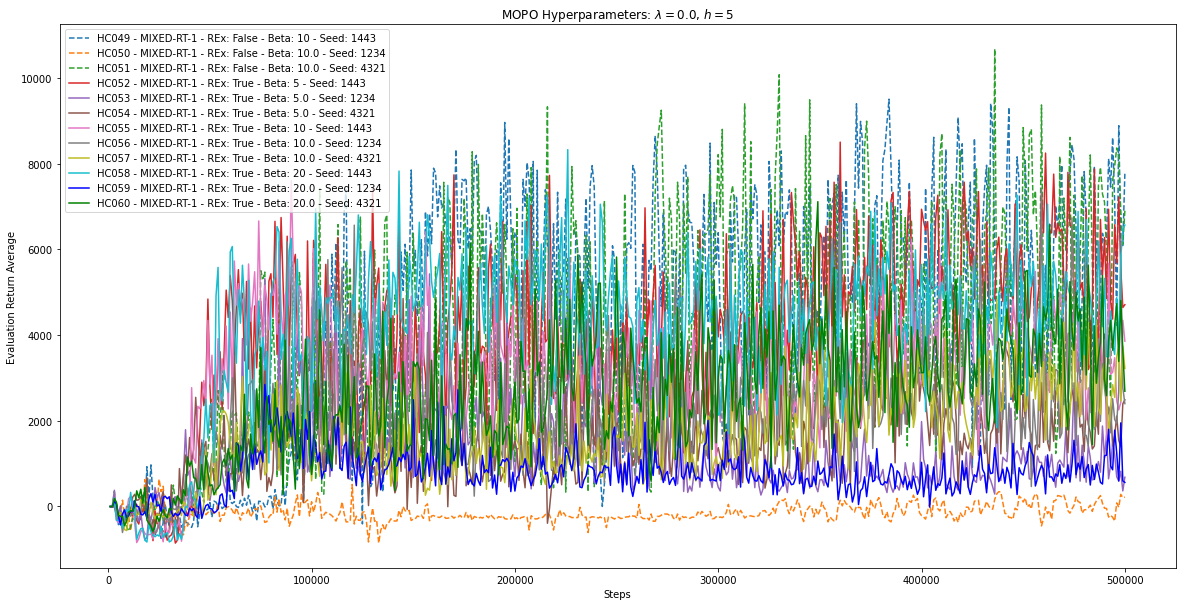

In [6]:
plot_evaluation_returns([
    HC049,
    HC050,
    HC051,
    HC052,
    HC053,
    HC054,
    HC055,
    HC056,
    HC057,
    HC058,
    HC059,
    HC060,
], title='MOPO Hyperparameters: $\\lambda=0.0$, $h=5$')

{'No REx': {'mean': 4961, 'std': 3372, 'count': 3, 'text': '4961 ± 3372'},
 'REx - $\\beta=5.0$': {'mean': 2627,
  'std': 1646,
  'count': 3,
  'text': '2627 ± 1646'},
 'REx - $\\beta=10.0$': {'mean': 3160,
  'std': 597,
  'count': 3,
  'text': '3160 ± 597'},
 'REx - $\\beta=20.0$': {'mean': 3273,
  'std': 2486,
  'count': 3,
  'text': '3273 ± 2486'}}

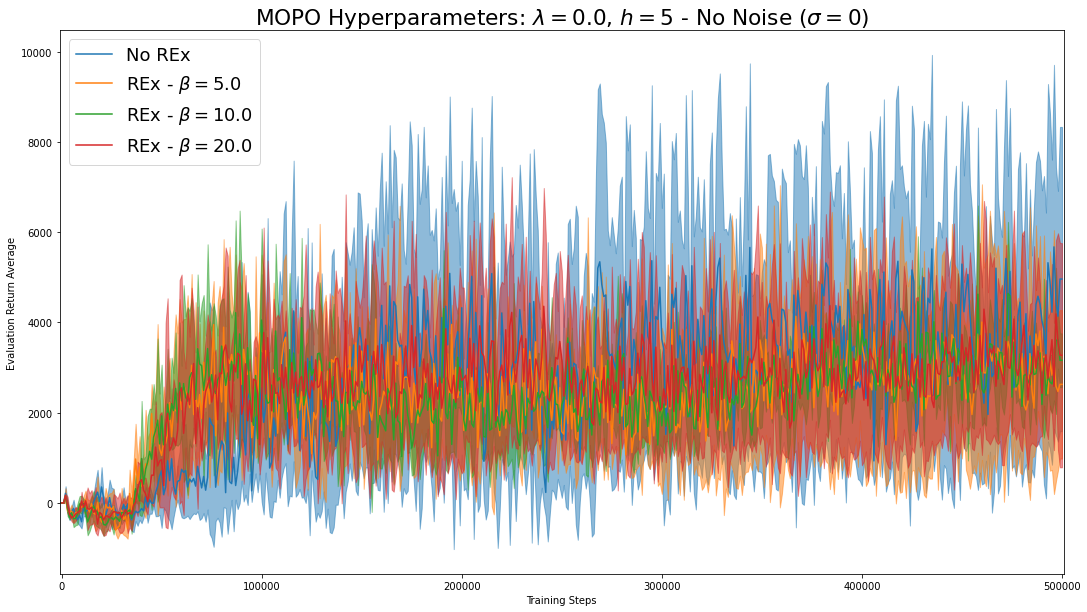

In [7]:
plot_grouped_evaluation_returns([
    ((HC049, HC050, HC051), 'No REx'),
    ((HC052, HC053, HC054), 'REx - $\\beta=5.0$'),
    ((HC055, HC056, HC057), 'REx - $\\beta=10.0$'),
    ((HC058, HC059, HC060), 'REx - $\\beta=20.0$'),
], title='MOPO Hyperparameters: $\\lambda=0.0$, $h=5$ - No Noise ($\sigma=0$)')

# MOPO: 0.0 - Rollout-Length: 5.0 - Noise 0.01

In [8]:
#######################################
# MOPO - Penalty 0.0 - Rollout Length 5
#######################################

HC414 = get_results("HC414") # No Rex
HC415 = get_results("HC415")
HC416 = get_results("HC416")
HC417 = get_results("HC417") # REx - 5.0
HC418 = get_results("HC418")
HC419 = get_results("HC419")
HC420 = get_results("HC420") # REx - 10.0
HC421 = get_results("HC421")
HC422 = get_results("HC422")
HC423 = get_results("HC423") # REx - 20.0
HC424 = get_results("HC424")
HC425 = get_results("HC425")

HC414: -184.24044799804688
HC415: 504.5774841308594
HC416: 5344.02734375
HC417: 5601.16943359375
HC418: 5697.2255859375
HC419: 5486.6318359375
HC420: 1782.217529296875
HC421: 4706.0029296875
HC422: 4606.48583984375
HC423: 4291.7431640625
HC424: 3500.994873046875
HC425: 1164.4842529296875


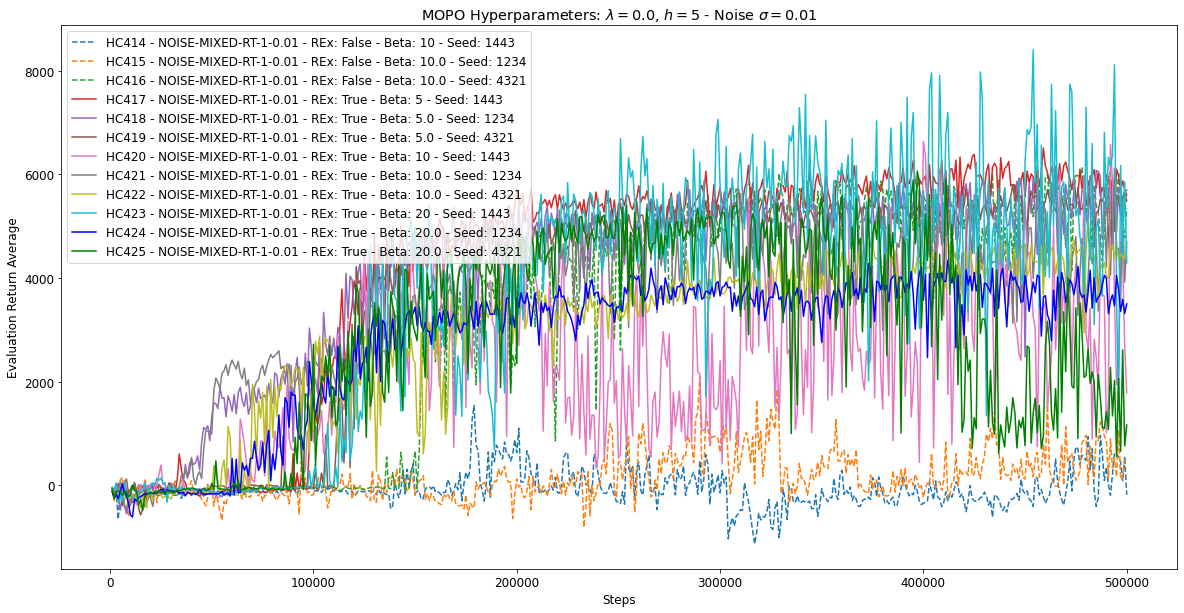

In [9]:
plot_evaluation_returns([
    HC414,
    HC415,
    HC416,
    HC417,
    HC418,
    HC419,
    HC420,
    HC421,
    HC422,
    HC423,
    HC424,
    HC425,
], title='MOPO Hyperparameters: $\\lambda=0.0$, $h=5$ - Noise $\sigma=0.01$')

{'No REx': {'mean': 1888, 'std': 2460, 'count': 3, 'text': '1888 ± 2460'},
 'REx - $\\beta=5.0$': {'mean': 5595,
  'std': 86,
  'count': 3,
  'text': '5595 ± 86'},
 'REx - $\\beta=10.0$': {'mean': 3698,
  'std': 1355,
  'count': 3,
  'text': '3698 ± 1355'},
 'REx - $\\beta=20.0$': {'mean': 2986,
  'std': 1328,
  'count': 3,
  'text': '2986 ± 1328'}}

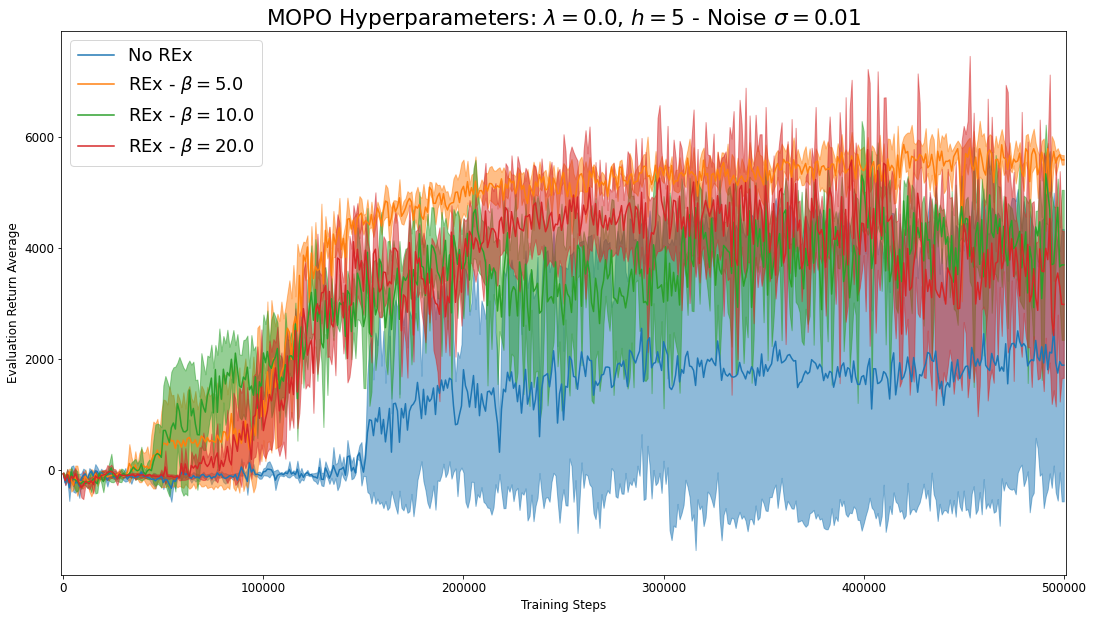

In [10]:
plot_grouped_evaluation_returns([
    ((HC414, HC415, HC416), 'No REx'),
    ((HC417, HC418, HC419), 'REx - $\\beta=5.0$'),
    ((HC420, HC421, HC422), 'REx - $\\beta=10.0$'),
    ((HC423, HC424, HC425), 'REx - $\\beta=20.0$'),
], title='MOPO Hyperparameters: $\\lambda=0.0$, $h=5$ - Noise $\sigma=0.01$')

# MOPO: 0.0 - Rollout-Length: 5.0 - Noise 0.05

In [11]:
#######################################
# MOPO - Penalty 0.0 - Rollout Length 5
#######################################

HC426 = get_results("HC426") # No Rex
HC427 = get_results("HC427")
HC428 = get_results("HC428")
HC429 = get_results("HC429") # REx - 5.0
HC430 = get_results("HC430")
HC431 = get_results("HC431")
HC432 = get_results("HC432") # REx - 10.0
HC433 = get_results("HC433")
HC434 = get_results("HC434")
HC435 = get_results("HC435") # REx - 20.0
HC436 = get_results("HC436")
HC437 = get_results("HC437")

HC426: 249.5795135498047
HC427: -199.01426696777344
HC428: -8.19227409362793
HC429: 1852.9202880859375
HC430: 4829.3232421875
HC431: 5573.14892578125
HC432: 4125.1962890625
HC433: 5102.63232421875
HC434: 5011.7314453125
HC435: 6433.1923828125
HC436: 2643.947998046875
HC437: 2327.15869140625


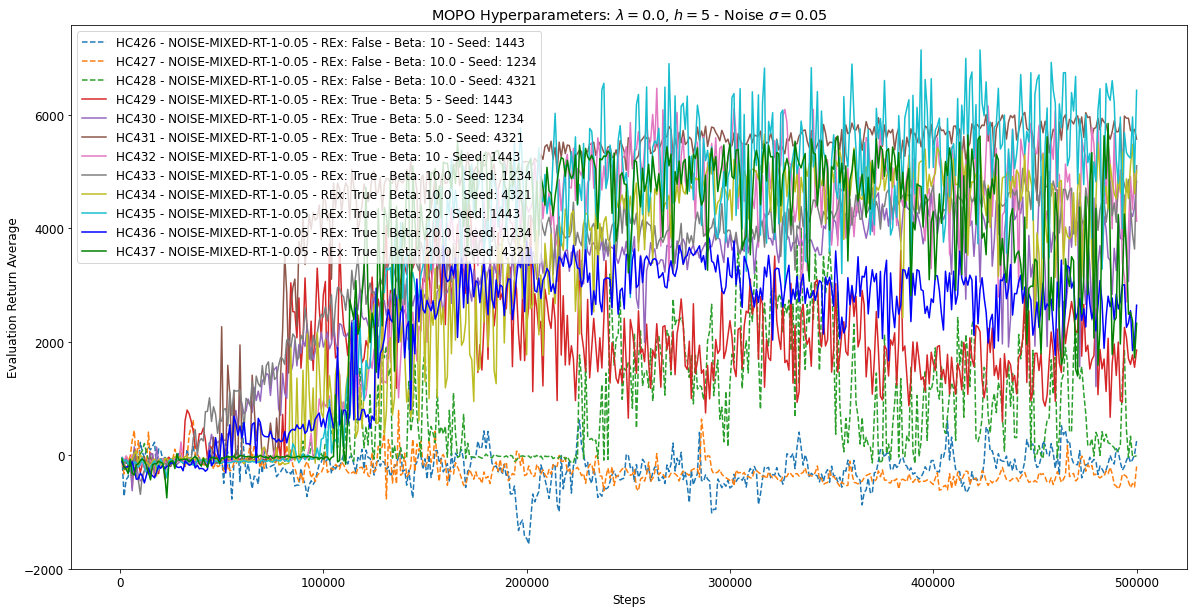

In [12]:
plot_evaluation_returns([
    HC426,
    HC427,
    HC428,
    HC429,
    HC430,
    HC431,
    HC432,
    HC433,
    HC434,
    HC435,
    HC436,
    HC437,
], title='MOPO Hyperparameters: $\\lambda=0.0$, $h=5$ - Noise $\sigma=0.05$')

{'No REx': {'mean': 14, 'std': 184, 'count': 3, 'text': '14 ± 184'},
 'REx - $\\beta=5.0$': {'mean': 4085,
  'std': 1607,
  'count': 3,
  'text': '4085 ± 1607'},
 'REx - $\\beta=10.0$': {'mean': 4747,
  'std': 441,
  'count': 3,
  'text': '4747 ± 441'},
 'REx - $\\beta=20.0$': {'mean': 3801,
  'std': 1865,
  'count': 3,
  'text': '3801 ± 1865'}}

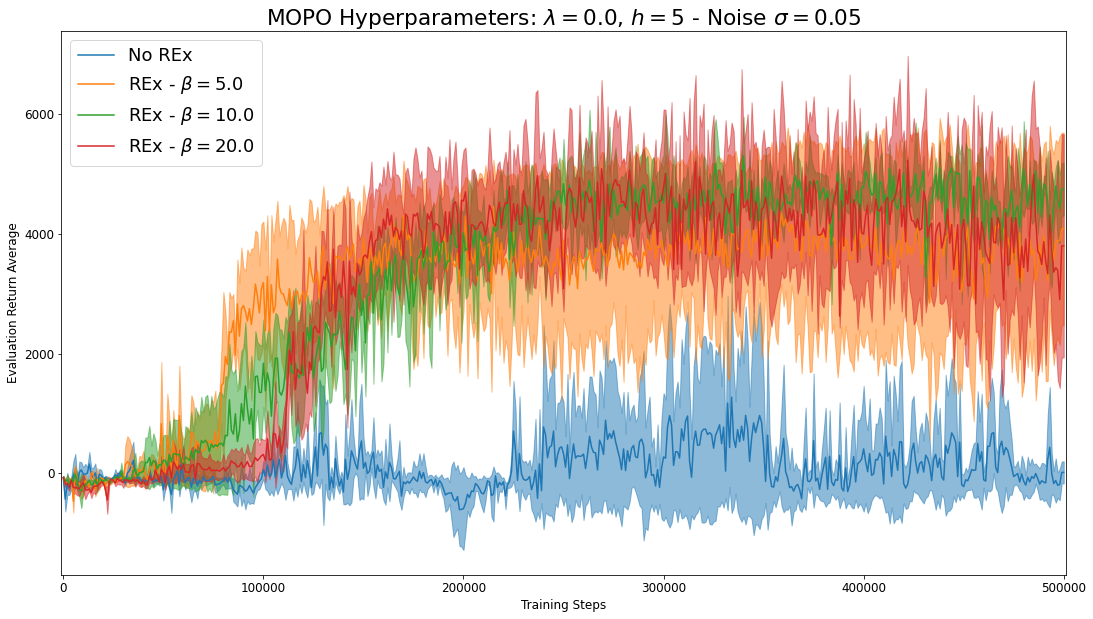

In [13]:
plot_grouped_evaluation_returns([
    ((HC426, HC427, HC428), 'No REx'),
    ((HC429, HC430, HC431), 'REx - $\\beta=5.0$'),
    ((HC432, HC433, HC434), 'REx - $\\beta=10.0$'),
    ((HC435, HC436, HC437), 'REx - $\\beta=20.0$'),
], title='MOPO Hyperparameters: $\\lambda=0.0$, $h=5$ - Noise $\sigma=0.05$')

# MOPO: 0.0 - Rollout-Length: 5.0 - Noise 0.1

In [14]:
#######################################
# MOPO - Penalty 0.0 - Rollout Length 5
#######################################

HC438 = get_results("HC438") # No Rex
HC439 = get_results("HC439")
HC440 = get_results("HC440")
HC441 = get_results("HC441") # REx - 5.0
HC442 = get_results("HC442")
HC443 = get_results("HC443")
HC444 = get_results("HC444") # REx - 10.0
HC445 = get_results("HC445")
HC446 = get_results("HC446")
HC447 = get_results("HC447") # REx - 20.0
HC448 = get_results("HC448")
HC449 = get_results("HC449")

HC438: -538.2364501953125
HC439: -88.70104217529297
HC440: 478.25299072265625
HC441: 3313.768798828125
HC442: -258.76080322265625
HC443: 4669.6552734375
HC444: 3046.876220703125
HC445: 2605.427001953125
HC446: 3400.834716796875
HC447: 1397.62548828125
HC448: 2746.963623046875
HC449: 4277.39111328125


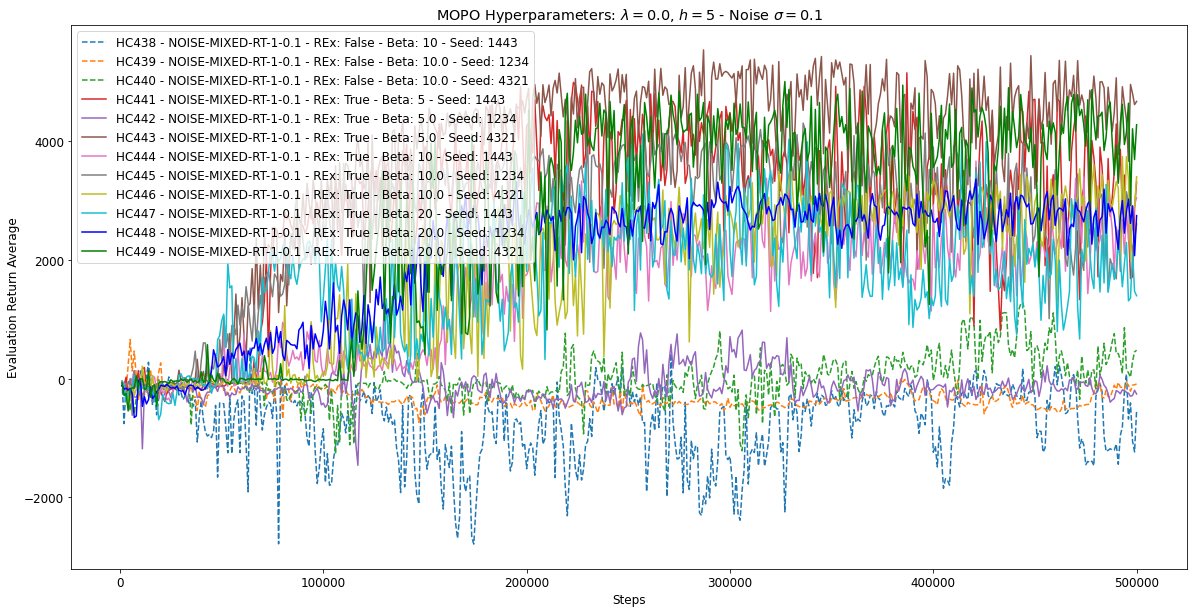

In [15]:
plot_evaluation_returns([
    HC438,
    HC439,
    HC440,
    HC441,
    HC442,
    HC443,
    HC444,
    HC445,
    HC446,
    HC447,
    HC448,
    HC449,
], title='MOPO Hyperparameters: $\\lambda=0.0$, $h=5$ - Noise $\sigma=0.1$')

{'No REx': {'mean': -50, 'std': 416, 'count': 3, 'text': '-50 ± 416'},
 'REx - $\\beta=5.0$': {'mean': 2575,
  'std': 2079,
  'count': 3,
  'text': '2575 ± 2079'},
 'REx - $\\beta=10.0$': {'mean': 3018,
  'std': 325,
  'count': 3,
  'text': '3018 ± 325'},
 'REx - $\\beta=20.0$': {'mean': 2807,
  'std': 1176,
  'count': 3,
  'text': '2807 ± 1176'}}

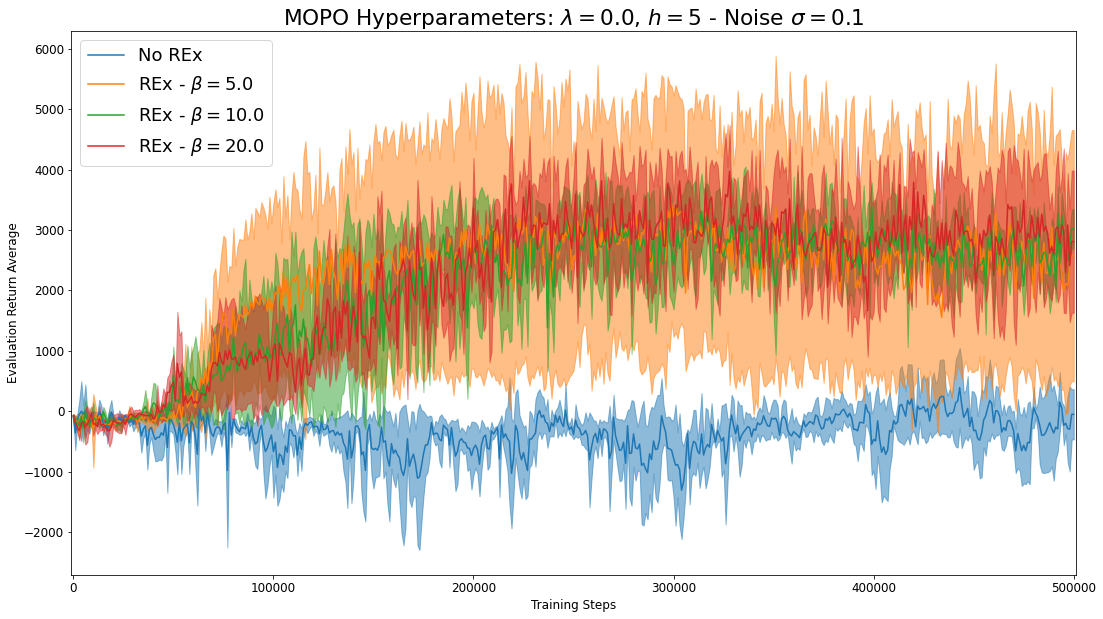

In [16]:
plot_grouped_evaluation_returns([
    ((HC438, HC439, HC440), 'No REx'),
    ((HC441, HC442, HC443), 'REx - $\\beta=5.0$'),
    ((HC444, HC445, HC446), 'REx - $\\beta=10.0$'),
    ((HC447, HC448, HC449), 'REx - $\\beta=20.0$'),
], title='MOPO Hyperparameters: $\\lambda=0.0$, $h=5$ - Noise $\sigma=0.1$')